In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.stats import zscore

In [3]:
os.chdir("/Users/sandeepsingh/Desktop")
df = pd.read_csv('Cust_Spend_Data.csv')

In [5]:
df.head(11)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [8]:
#First we need to consider only numeric columns (ignore the customer_id,name column here)
df1= df.iloc[:,2:]
df1.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [12]:
#next we need to sscale all columns (Remeber distance based algo, so scaling is a must)
df2= df1.apply(zscore)
df2.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


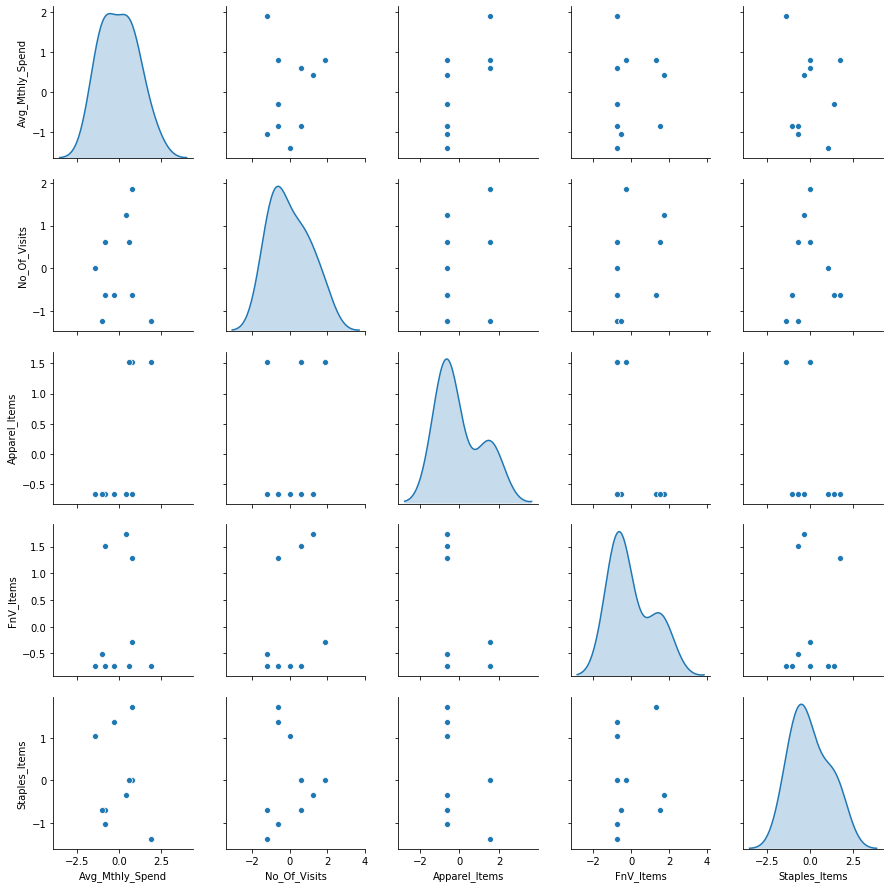

In [10]:
#next lets find the optimum no of cluster (just by visualisation)
sns.pairplot(df2,diag_kind = 'kde')

#Looks like 2 to 3 cluster should be good here

### Hieraricahl Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='average')
model.fit(df2)

#Remeber here we gave cluster = 3 for testing, its not required in heiorarichal clustering..dendogram gives the true picture

AgglomerativeClustering(linkage='average', n_clusters=3)

In [18]:
#Appending the predictions (on both orogonal data as well as scaled data)
df1['labels'] = model.labels_
df1.head(11)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [20]:
df1_cluster = df1.groupby(['labels'])
df1_cluster.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


### Building the dendogram for heirarichal clustering

In [24]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

from scipy.spatial.distance import pdist #Pairwise distribution between data points

z=linkage(df2, metric= 'euclidean', method='average')
c,coph_dist = cophenet(z,pdist(df2))

c
#cophenet index ie. cophenet correlation is ~0.86 ie closer to 1 so its a good

0.8681149436293064

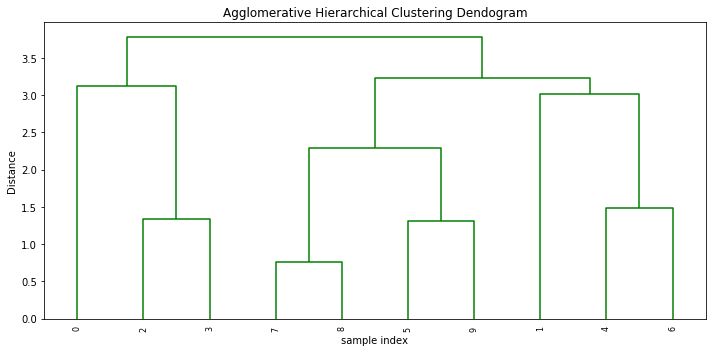

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [27]:
#lets try with complete linkage
z=linkage(df2, metric= 'euclidean', method='complete')
c,coph_dist = cophenet(z,pdist(df2))

c
#cophenet index ie. cophenet correlation is ~0.86 ie closer to 1 so its a good



0.8606955190809153

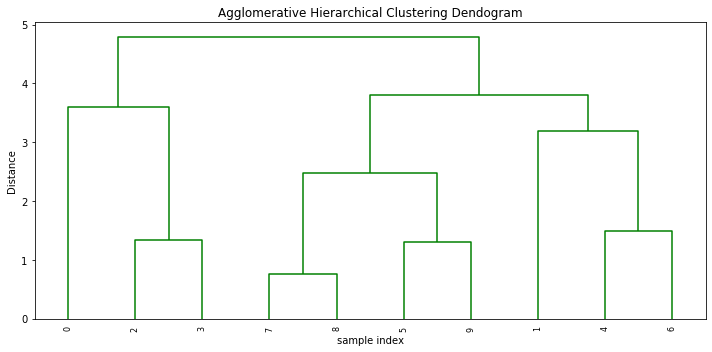

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [31]:
#lets try with ward linkage
z=linkage(df2, metric= 'euclidean', method='ward')
c,coph_dist = cophenet(z,pdist(df2))

c
#cophenet index ie. cophenet correlation is ~0.86 ie closer to 1 so its a good



0.8453818941339526

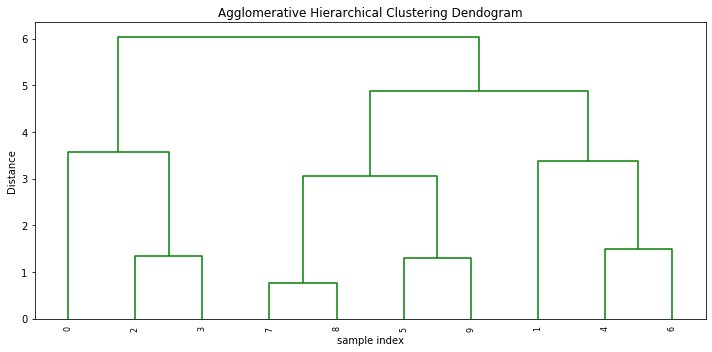

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()